# COVID-19 Status (Colombia)

##### Limpieza y ajuste de datos (Desarrollador)*

In [1]:
# Libraries import
from datetime import datetime
from plotly.offline import init_notebook_mode, iplot
import requests
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from googletrans import Translator
import matplotlib.pyplot as plt
import statsmodels.api as sn

In [2]:
# Dataset import - 'Datos abiertos COVID-19 (Colombia)'
data = pd.DataFrame.from_dict(requests.get('https://www.datos.gov.co/resource/gt2j-8ykr.json?$limit=999999999').json())
#data

In [3]:
# Data cleaning and adjusting

# FE DE ERRATAS (2020-05-03): --------------------------------------------------------------------------------------------------------------------------------------------------
#data.loc[(data['Edad'].str.contains('-   -'))] = None
    
data = data[~data['edad'].str.contains('-   -')]
#---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#translator = Translator()

data.columns = ['Id de caso', 'Fecha de notificación', 'Código DIVIPOLA', 'Ciudad de ubicación', 'Departamento', 'Estado', 'Edad', 'Sexo', 'Tipo', 'Severidad','País de procedencia', 'Fecha de inicio de síntomas', 'Fecha de diagnóstico', 'Fecha de recuperación', 'Fecha de reporte web', 'Tipo de recuperación', 'Código departamento', 'Código país', 'Pertenecia Étnica', 'Fecha de defunción', 'Nombre Grupo Étnico']

for column in ['Ciudad de ubicación', 'Estado', 'Sexo', 'Tipo', 'Severidad', 'País de procedencia']:
    data[column] = data[column].str.capitalize()
    
for column in ['Fecha de notificación', 'Fecha de inicio de síntomas', 'Fecha de defunción', 'Fecha de diagnóstico', 'Fecha de recuperación', 'Fecha de reporte web']:
       data[column] = data[column].str.slice(0,10).replace(r'(\d+)-(\d+)-(\d+)', r'\1-\2-\3', regex=True).apply(lambda x: pd.to_datetime(x, dayfirst=True, errors='ignore'))

data.loc[(data['Edad'].str.contains('[a-zA-Z]+', regex=True)), 'Edad'] = 0
data['Clasificación de edad'] = pd.cut(x=data['Edad'].apply(lambda x: float(x)), bins=[-np.inf,10,20,30,40,50,60,70,80,90,np.inf], include_lowest=True, labels=['0 - 10', '10 - 20', '20 - 30', '30 - 40', '40 - 50', '50 - 60', '60 - 70', '70 - 80', '80 - 90', '90 - 100+'])

#data['País de procedencia'] = data['País de procedencia'].apply(Translator().translate, src='es', dest='en').apply(getattr, args=('text',))

data = data[['Id de caso', 'Fecha de reporte web', 'Fecha de diagnóstico', 'Fecha de notificación', 'Fecha de inicio de síntomas', 'Fecha de recuperación', 'Fecha de defunción', 'Ciudad de ubicación', 'Departamento', 'Severidad', 'Estado', 'Edad', 'Clasificación de edad', 'Sexo', 'Pertenecia Étnica', 'Nombre Grupo Étnico', 'Tipo', 'Tipo de recuperación', 'País de procedencia', 'Código departamento', 'Código país', 'Código DIVIPOLA']]
data = data.set_index('Id de caso')

date = datetime.today().strftime('%Y-%m-%d')
data.to_csv(f'./Datasets/COVID-19 Status (Colombia) [{date}].csv', index = True)

def numbers(div):
    for i in range(0, len(ax.patches)//div, 1):
        height = 0
        for j in range(0, div, 1):
            height += ax.patches[j*(len(ax.patches)//div)+i].get_height()
        ax.text(ax.patches[i].get_x()+(ax.patches[i].get_width()/10),height+(height/100)+10, int(height), fontsize=7, color='dimgrey', rotation=90)

def numbers_H(div):
    for i in range(0, len(ax.patches)//div, 1):
        width = 0
        for j in range(0, div, 1):
            width += ax.patches[j*(len(ax.patches)//div)+i].get_width()
        ax.text(width+(width/100)+10,ax.patches[i].get_y()+(ax.patches[i].get_height()/10), int(width), fontsize=7, color='dimgrey', rotation=0)

In [4]:
# Test

#data['País de procedencia'].unique().apply(lambda x: Translator().translate(x, src='es', dest='en').text)
#Translator().translate('España', src='es', dest='en').text

In [5]:
# In-line plots libraries import

%matplotlib inline
init_notebook_mode(connected = True)

## Análisis Dataset - COVID-19 (Colombia)

### - Datos Abiertos COVID-19 (Colombia)

In [6]:
data

Fecha de reporte web Fecha de diagnóstico Fecha de notificación  \
Id de caso                                                                   
1                    2020-03-06           2020-03-06            2020-03-02   
2                    2020-03-09           2020-03-09            2020-03-06   
3                    2020-03-09           2020-03-09            2020-03-07   
4                    2020-03-11           2020-03-11            2020-03-09   
5                    2020-03-11           2020-03-11            2020-03-09   
...                         ...                  ...                   ...   
376906               2020-08-08           2020-08-03            2020-07-17   
376907               2020-08-08           2020-08-03            2020-07-21   
376908               2020-08-08           2020-08-03            2020-07-18   
376909               2020-08-08           2020-07-25            2020-07-05   
376910               2020-08-08           2020-07-27            2020-06-05   

           Fecha de inicio de síntomas Fecha de recuperación  \
Id de caso                                                     
1                  2020-02-27 00:00:00            2020-03-13   
2                  2020-03-04 00:00:00            2020-03-19   
3                  2020-02-29 00:00:00            2020-03-15   
4                  2020-03-06 00:00:00            2020-03-26   
5                  2020-03-08 00:00:00            2020-03-23   
...                                ...                   ...   
376906             2020-07-14 00:00:00                   NaT   
376907             2020-07-10 00:00:00                   NaT   
376908             2020-07-07 00:00:00                   NaT   
376909             2020-07-02 00:00:00                   NaT   
376910             2020-06-03 00:00:00                   NaT   

           Fecha de defunción  Ciudad de ubicación     Departamento Severidad  \
Id de caso                                                                      
1                         NaT          Bogotá d.c.      Bogotá D.C.      Leve   
2                         NaT  Guadalajara de buga  Valle del Cauca      Leve   
3                         NaT             Medellín        Antioquia      Leve   
4                         NaT             Medellín        Antioquia      Leve   
5                         NaT             Medellín        Antioquia      Leve   
...                       ...                  ...              ...       ...   
376906                    NaT          Bogotá d.c.      Bogotá D.C.      Leve   
376907                    NaT          Bogotá d.c.      Bogotá D.C.      Leve   
376908                    NaT          Bogotá d.c.      Bogotá D.C.      Leve   
376909                    NaT          Bogotá d.c.      Bogotá D.C.      Leve   
376910                    NaT          Bogotá d.c.      Bogotá D.C.  Moderado   

                Estado  ... Clasificación de edad Sexo Pertenecia Étnica  \
Id de caso              ...                                                
1           Recuperado  ...               10 - 20    F              Otro   
2           Recuperado  ...               30 - 40    M              Otro   
3           Recuperado  ...               40 - 50    F              Otro   
4           Recuperado  ...               50 - 60    M              Otro   
5           Recuperado  ...               20 - 30    M              Otro   
...                ...  ...                   ...  ...               ...   
376906            Casa  ...               30 - 40    M               NaN   
376907            Casa  ...               20 - 30    F               NaN   
376908            Casa  ...               20 - 30    M               NaN   
376909            Casa  ...               80 - 90    M               NaN   
376910        Hospital  ...               30 - 40    F               NaN   

           Nombre Grupo Étnico         Tipo Tipo de recuperación  \
Id de caso                                          

### - Mapa de influencia - COVID-19 (Colombia) [Beta]

In [7]:
map_data = dict(
    type = 'choropleth',
    locations = data['País de procedencia'],
    locationmode = 'country names',
    colorscale = 'viridis',
    z = data['País de procedencia'].value_counts().tolist())

geo_map = go.Figure(data=[map_data])
iplot(geo_map)

### - Casos confirmados VS Departamento (Sexo)

In [8]:
data.groupby(['Departamento', 'Sexo']).size().unstack().fillna(0)

Sexo                                                    F      M
Departamento                                                    
Amazonas                                             1092   1492
Antioquia                                           22487  25855
Arauca                                                 95    240
Archipiélago de San Andrés Providencia y Santa ...     19     30
Atlántico                                           11840  13144
Barranquilla D.E.                                   15132  17409
Bogotá D.C.                                         64438  65537
Bolívar                                              1338   1689
Boyacá                                                709    800
Buenaventura D.E.                                     816   1387
Caldas                                                609    606
Caquetá                                              1016   1125
Cartagena D.T. y C.                                  7737   9308
Casanare                                              193    250
Cauca                                                1125   1424
Cesar                                                1921   2461
Chocó                                                1450   1718
Cundinamarca                                         5854   5772
Córdoba                                              4315   4401
Guainía                                                 6      8
Guaviare                                               16    112
Huila                                                 713    757
La Guajira                                           1290   1379
Magdalena                                            1264   1328
Meta                                                 1125   2612
Nariño                                               4359   5006
Norte de Santander                                   1869   2433
Putumayo                                              626    753
Quindío                                               249    247
Risaralda                                            1263   1250
Santa Marta D.T. y C.                                2734   2818
Santander                                            2624   3722
Sucre                                                3378   3852
Tolima                                               1229   2293
Valle del Cauca                                     13611  15044
Vaupés                                                 27     34
Vichada                                                 1      4

In [9]:
ax = data.groupby(['Departamento', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Departamento (Clasificación de edad)

In [10]:
data.groupby(['Departamento', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad                               0 - 10  10 - 20  20 - 30  \
Departamento                                                                   
Amazonas                                               138      462      524   
Antioquia                                             1634     3315    12594   
Arauca                                                  16       60      108   
Archipiélago de San Andrés Providencia y Santa ...       0        1       14   
Atlántico                                             1129     1992     5311   
Barranquilla D.E.                                     1269     2157     7084   
Bogotá D.C.                                           5816     9873    29763   
Bolívar                                                154      288      686   
Boyacá                                                  80      149      309   
Buenaventura D.E.                                       48      286      508   
Caldas                                                  50       91      266   
Caquetá                                                 67      127      609   
Cartagena D.T. y C.                                    801     1268     3869   
Casanare                                                20       22      129   
Cauca                                                  107      205      595   
Cesar                                                  262      381     1050   
Chocó                                                  137      279      759   
Cundinamarca                                           547      897     2704   
Córdoba                                                272      518     1797   
Guainía                                                  0        2        4   
Guaviare                                                 1       35       29   
Huila                                                   68      133      339   
La Guajira                                             149      255      560   
Magdalena                                              139      186      479   
Meta                                                    84      302     1137   
Nariño                                                 410      770     2186   
Norte de Santander                                     123      218      977   
Putumayo                                                41      125      400   
Quindío                                                 15       27      122   
Risaralda                                              147      227      582   
Santa Marta D.T. y C.                                  233      393     1219   
Santander                                              224      401     1460   
Sucre                                                  288      598     1503   
Tolima                                                 157      221      933   
Valle del Cauca                                        948     1867     6567   
Vaupés                                                   4        5       19   
Vichada                                                  0        4        0   

Clasificación de edad                               30 - 40  40 - 50  50 - 60  \
Departamento                                                                    
Amazonas                                                497      348      286   
Antioquia                                             12138     7466     5821   
Arauca                                                   85       30       22   
Archipiélago de San Andrés Providencia y Santa ...       13       11        5   
Atlántico                                              5730     3970     3314   
Barranquilla D.E.                                      7691     5095     4370   
Bogotá D.C.                                           28730    21022    17623   
Bolívar                                                 700      421      281   
Boyacá                                                  297      246 

In [11]:
ax = data.groupby(['Departamento', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Departamento (Estado)

In [12]:
data.groupby(['Departamento', 'Estado']).size().unstack().fillna(0)

Estado                                                 Casa  Fallecido  \
Departamento                                                             
Amazonas                                              102.0      104.0   
Antioquia                                           25849.0      834.0   
Arauca                                                141.0        8.0   
Archipiélago de San Andrés Providencia y Santa ...     10.0        0.0   
Atlántico                                            4457.0     1134.0   
Barranquilla D.E.                                    4596.0     1535.0   
Bogotá D.C.                                         58139.0     3578.0   
Bolívar                                               908.0      137.0   
Boyacá                                                732.0       34.0   
Buenaventura D.E.                                     171.0      150.0   
Caldas                                                717.0       17.0   
Caquetá                                              1402.0       54.0   
Cartagena D.T. y C.                                  2417.0      482.0   
Casanare                                              221.0        6.0   
Cauca                                                 981.0       86.0   
Cesar                                                1939.0       90.0   
Chocó                                                 386.0      114.0   
Cundinamarca                                         4513.0      312.0   
Córdoba                                              3662.0      802.0   
Guainía                                                 0.0        1.0   
Guaviare                                               64.0        0.0   
Huila                                                 744.0       34.0   
La Guajira                                            785.0      145.0   
Magdalena                                             540.0      236.0   
Meta                                                 1421.0       52.0   
Nariño                                               2676.0      323.0   
Norte de Santander                                   2304.0      224.0   
Putumayo                                              755.0       59.0   
Quindío                                               228.0       11.0   
Risaralda                                            1377.0       48.0   
Santa Marta D.T. y C.                                2032.0      191.0   
Santander                                            3435.0      222.0   
Sucre                                                1932.0      393.0   
Tolima                                               1408.0       74.0   
Valle del Cauca                                      9171.0     1049.0   
Vaupés                                                  1.0        1.0   
Vichada                                                 3.0        0.0   

Estado                                              Hospital  Hospital uci  \
Departamento                                                                 
Amazonas                                                 7.0           4.0   
Antioquia                                             1777.0         181.0   
Arauca                                                  12.0           4.0   
Archipiélago de San Andrés Providencia y Santa ...       4.0           1.0   
Atlántico                                              548.0          71.0   
Barranquilla D.E.                                      756.0          68.0   
Bogotá D.C.                                           6461.0         400.0   
Bolívar                                                120.0          14.0   
Boyacá                                                  95.0           9.0   
Buenaventura D.E.                                      118.0          17.0   
Caldas                                                  48.0           5.0   
Caquetá                                                138.0           6.0   
Cartagena D.T. y C.  

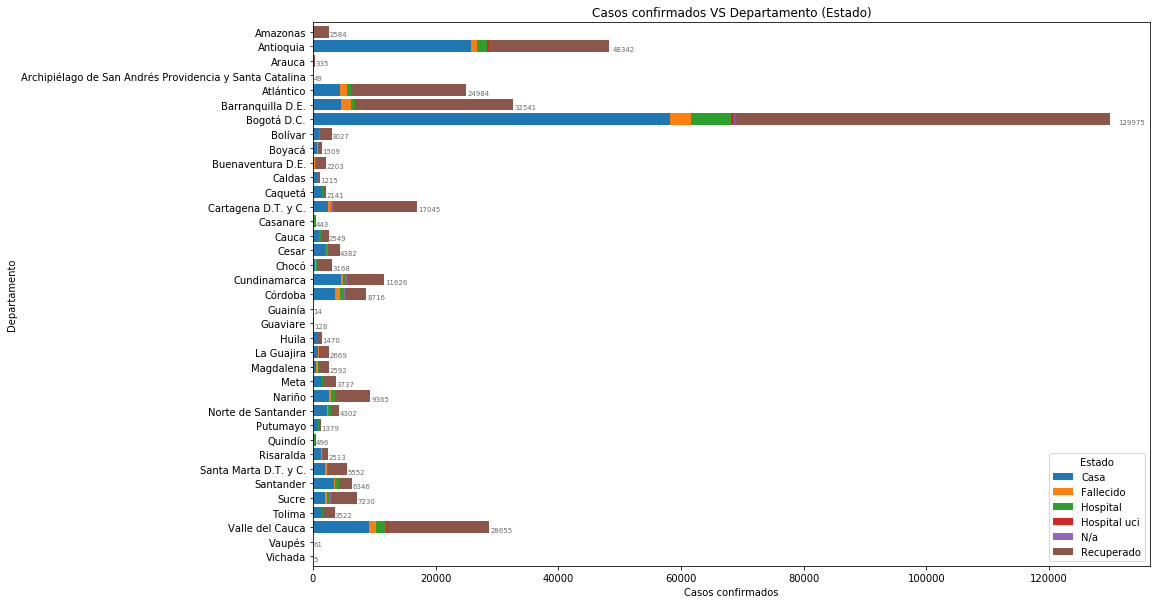

In [13]:
ax = data.groupby(['Departamento', 'Estado']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Estado)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers_H(div)

### - Casos confirmados VS Estado (Sexo)

In [14]:
data.groupby(['Estado', 'Sexo']).size().unstack().fillna(0)

Sexo              F       M
Estado                     
Casa          68723   71496
Fallecido      4544    7996
Hospital       7268    9833
Hospital uci    569    1060
N/a             336     454
Recuperado    97130  107461

In [15]:
ax = data.groupby(['Estado', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Estado (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Estado (Clasificación de edad)

In [16]:
data.groupby(['Estado', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Estado                                                                       
Casa                     5840    10920    34609    34308    22842    17590   
Fallecido                  27       22      174      426      964     1892   
Hospital                  678      356     1250     1982     2538     3570   
Hospital uci               70       25       58      142      242      389   
N/a                        23       16       38       30       59       95   
Recuperado               8940    16801    51066    50208    32829    24921   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Estado                                                       
Casa                      8396     3909     1534        271  
Fallecido                 3026     3175     2301        533  
Hospital                  3332     2196     1057        142  
Hospital uci               373      258       67          5  
N/a                        160      172      153         44  
Recuperado               12163     5266     2074        323

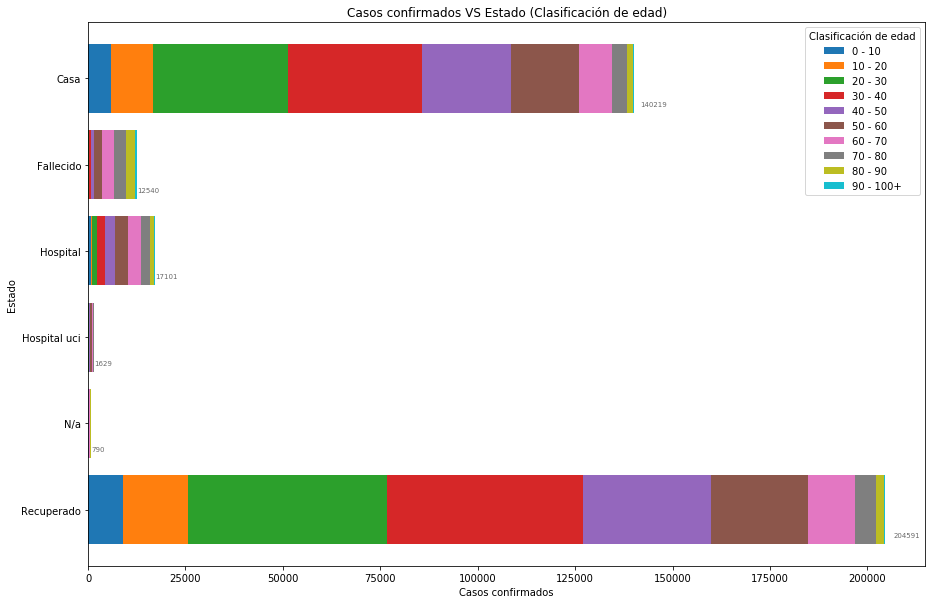

In [17]:
ax = data.groupby(['Estado', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Estado (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Tipo de contagio (Sexo)

In [18]:
data.groupby(['Tipo', 'Sexo']).size().unstack().fillna(0)

Sexo              F       M
Tipo                       
En estudio   171410  181429
Importado       456     521
Relacionado    6704   16350

In [19]:
ax = data.groupby(['Tipo', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Tipo de contagio (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Tipo (Clasificación de edad)

In [20]:
data.groupby(['Tipo', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Tipo                                                                         
En estudio              14631    25290    80453    81131    56292    46189   
Importado                   5       38      243      229      172      151   
Relacionado               942     2812     6499     5736     3010     2117   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Tipo                                                         
En estudio               26291    14436     6876       1250  
Importado                   94       35        9          1  
Relacionado               1065      505      301         67

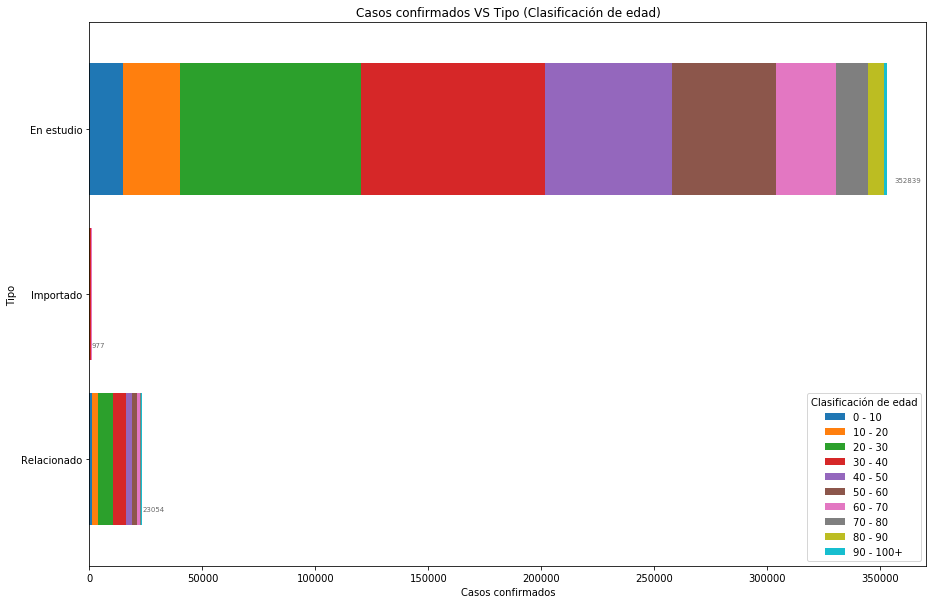

In [21]:
ax = data.groupby(['Tipo', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Tipo (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Clasificación de edad (Sexo)

In [22]:
data.groupby(['Clasificación de edad', 'Sexo']).size().unstack().fillna(0)

Sexo                       F      M
Clasificación de edad              
0 - 10                  7601   7977
10 - 20                13143  14997
20 - 30                42324  44871
30 - 40                40622  46474
40 - 50                28209  31265
50 - 60                22843  25614
60 - 70                12684  14766
70 - 80                 6819   8157
80 - 90                 3573   3613
90 - 100+                752    566

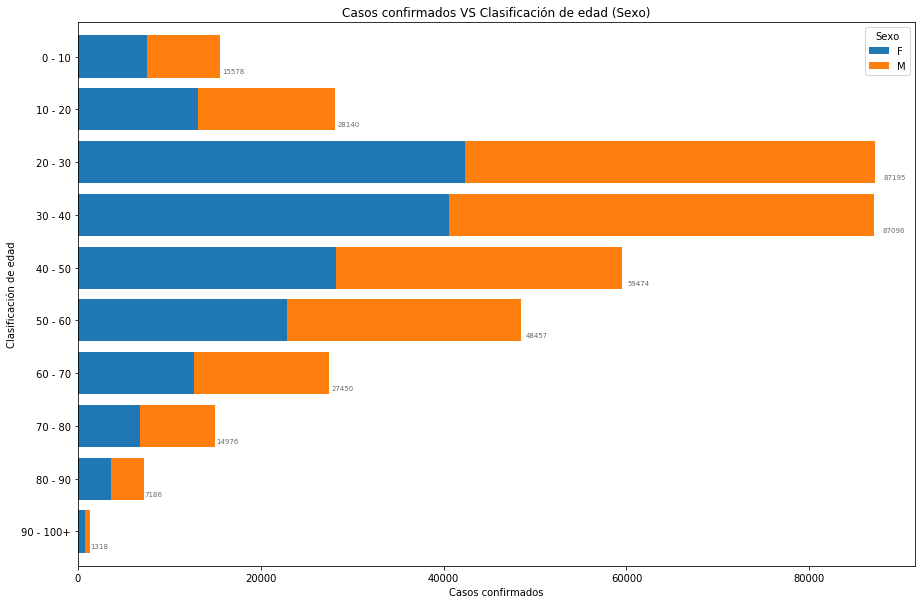

In [23]:
ax = data.groupby(['Clasificación de edad', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Clasificación de edad (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Clasificación de edad (Estado)

In [24]:
data.groupby(['Clasificación de edad', 'Estado']).size().unstack().fillna(0)

Estado                  Casa  Fallecido  Hospital  Hospital uci  N/a  \
Clasificación de edad                                                  
0 - 10                  5840         27       678            70   23   
10 - 20                10920         22       356            25   16   
20 - 30                34609        174      1250            58   38   
30 - 40                34308        426      1982           142   30   
40 - 50                22842        964      2538           242   59   
50 - 60                17590       1892      3570           389   95   
60 - 70                 8396       3026      3332           373  160   
70 - 80                 3909       3175      2196           258  172   
80 - 90                 1534       2301      1057            67  153   
90 - 100+                271        533       142             5   44   

Estado                 Recuperado  
Clasificación de edad              
0 - 10                       8940  
10 - 20                     16801  
20 - 30                     51066  
30 - 40                     50208  
40 - 50                     32829  
50 - 60                     24921  
60 - 70                     12163  
70 - 80                      5266  
80 - 90                      2074  
90 - 100+                     323

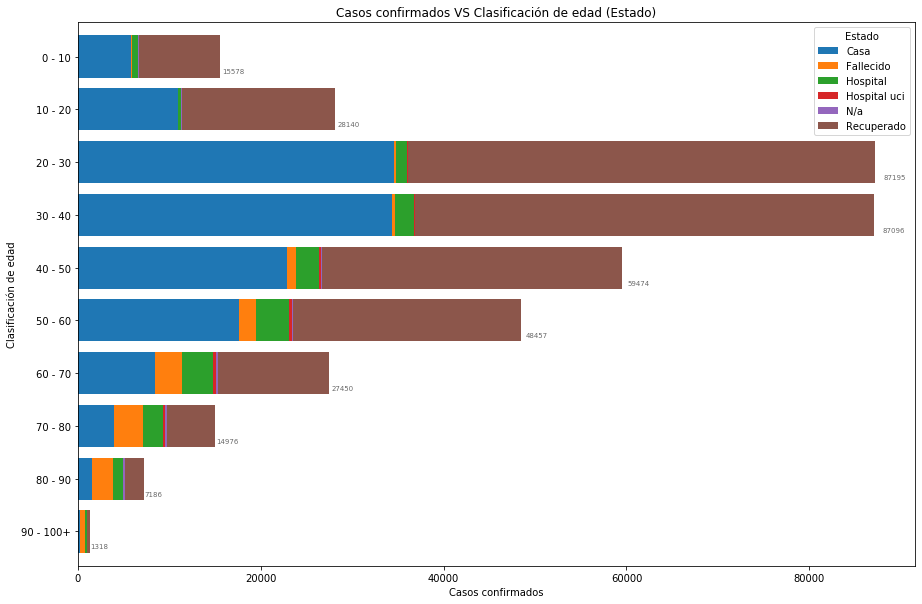

In [25]:
ax = data.groupby(['Clasificación de edad', 'Estado']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Clasificación de edad (Estado)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers_H(div)

### - Casos confirmados VS Fecha de diagnóstico (Sexo)

In [26]:
data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0)

Sexo                       F       M
Fecha de diagnóstico                
2020-03-06               1.0     0.0
2020-03-09               1.0     1.0
2020-03-11               4.0     2.0
2020-03-12               5.0     0.0
2020-03-13               2.0     3.0
...                      ...     ...
2020-08-04            5413.0  5546.0
2020-08-05            4460.0  4427.0
2020-08-06            3750.0  3763.0
2020-08-07            2827.0  2932.0
2020-08-08             166.0   148.0

[153 rows x 2 columns]

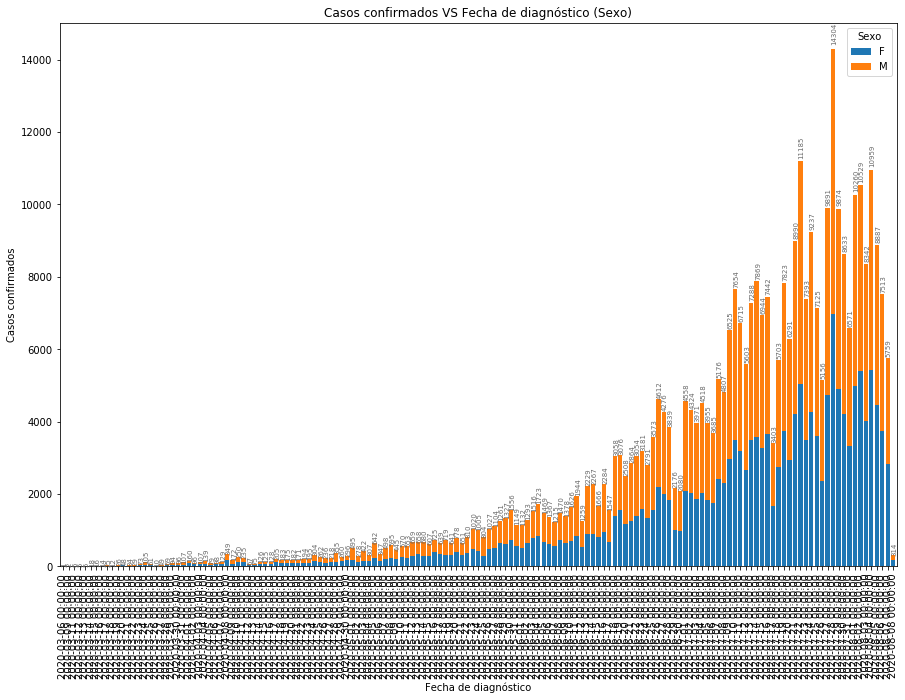

In [27]:
ax = data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Sexo)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers(div)

### - Casos confirmados VS Fecha de diagnóstico (Clasificación de edad)

In [28]:
data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Fecha de diagnóstico                                                         
2020-03-06                  0        1        0        0        0        0   
2020-03-09                  0        0        0        1        1        0   
2020-03-11                  0        0        4        0        0        1   
2020-03-12                  0        0        0        1        1        1   
2020-03-13                  0        0        1        0        2        0   
...                       ...      ...      ...      ...      ...      ...   
2020-08-04                460      776     2546     2535     1788     1505   
2020-08-05                383      619     2004     1997     1421     1207   
2020-08-06                362      590     1676     1649     1195      988   
2020-08-07                244      431     1337     1325      910      751   
2020-08-08                 10       22       77       75       51       43   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Fecha de diagnóstico                                         
2020-03-06                   0        0        0          0  
2020-03-09                   0        0        0          0  
2020-03-11                   0        0        1          0  
2020-03-12                   1        1        0          0  
2020-03-13                   2        0        0          0  
...                        ...      ...      ...        ...  
2020-08-04                 766      384      173         26  
2020-08-05                 675      364      184         33  
2020-08-06                 535      333      155         30  
2020-08-07                 402      229      110         20  
2020-08-08                  28        7        1          0  

[153 rows x 10 columns]

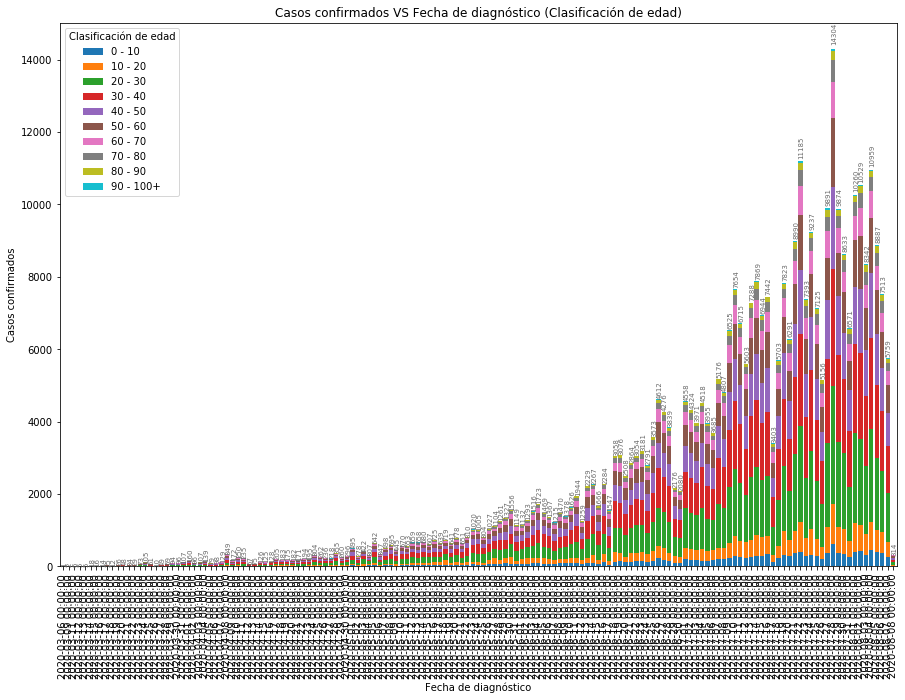

In [29]:
ax = data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Clasificación de edad)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers(div)

### - Casos confirmados VS Fecha de diagnóstico (Estado)

In [30]:
data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0)

Estado                   Casa  Fallecido  Hospital  Hospital uci   N/a  \
Fecha de diagnóstico                                                     
2020-03-06                0.0        0.0       0.0           0.0   0.0   
2020-03-09                0.0        0.0       0.0           0.0   0.0   
2020-03-11                0.0        0.0       0.0           0.0   0.0   
2020-03-12                0.0        0.0       0.0           0.0   0.0   
2020-03-13                0.0        0.0       0.0           0.0   0.0   
...                       ...        ...       ...           ...   ...   
2020-08-04            10325.0      138.0     475.0          11.0  10.0   
2020-08-05             8295.0      106.0     464.0          18.0   4.0   
2020-08-06             7003.0       81.0     405.0          21.0   3.0   
2020-08-07             5342.0        6.0     386.0          25.0   0.0   
2020-08-08              305.0        0.0       9.0           0.0   0.0   

Estado                Recuperado  
Fecha de diagnóstico              
2020-03-06                   1.0  
2020-03-09                   2.0  
2020-03-11                   6.0  
2020-03-12                   5.0  
2020-03-13                   5.0  
...                          ...  
2020-08-04                   0.0  
2020-08-05                   0.0  
2020-08-06                   0.0  
2020-08-07                   0.0  
2020-08-08                   0.0  

[153 rows x 6 columns]

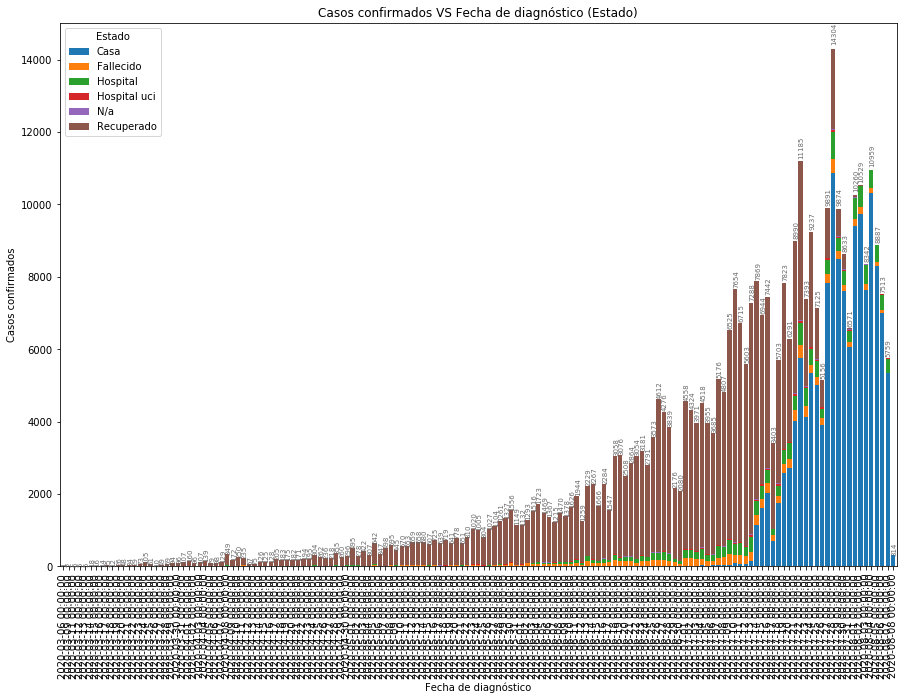

In [31]:
ax = data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Estado)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Sexo)

In [32]:
data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).cumsum()

Sexo                         F         M
Fecha de diagnóstico                    
2020-03-06                 1.0       0.0
2020-03-09                 2.0       1.0
2020-03-11                 6.0       3.0
2020-03-12                11.0       3.0
2020-03-13                13.0       6.0
...                        ...       ...
2020-08-04            165579.0  185045.0
2020-08-05            170039.0  189472.0
2020-08-06            173789.0  193235.0
2020-08-07            176616.0  196167.0
2020-08-08            176782.0  196315.0

[153 rows x 2 columns]

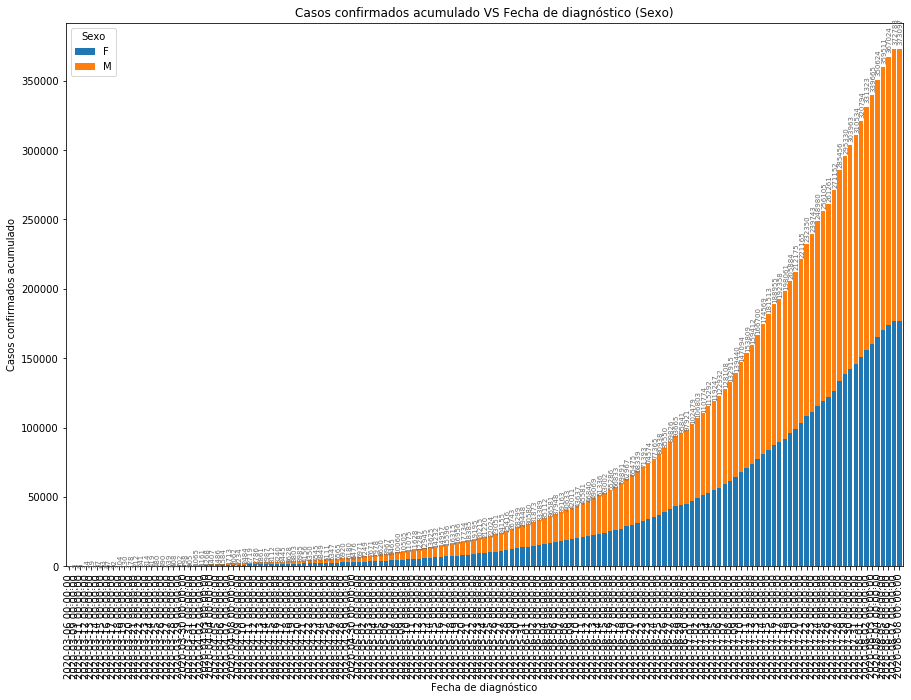

In [33]:
ax = data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulado VS Fecha de diagnóstico (Sexo)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Sexo'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Clasificación de edad)

In [34]:
data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).cumsum()

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Fecha de diagnóstico                                                         
2020-03-06                  0        1        0        0        0        0   
2020-03-09                  0        1        0        1        1        0   
2020-03-11                  0        1        4        1        1        1   
2020-03-12                  0        1        4        2        2        2   
2020-03-13                  0        1        5        2        4        2   
...                       ...      ...      ...      ...      ...      ...   
2020-08-04              14446    26208    81207    81141    55342    45004   
2020-08-05              14829    26827    83211    83138    56763    46211   
2020-08-06              15191    27417    84887    84787    57958    47199   
2020-08-07              15435    27848    86224    86112    58868    47950   
2020-08-08              15445    27870    86301    86187    58919    47993   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Fecha de diagnóstico                                         
2020-03-06                   0        0        0          0  
2020-03-09                   0        0        0          0  
2020-03-11                   0        0        1          0  
2020-03-12                   1        1        1          0  
2020-03-13                   3        1        1          0  
...                        ...      ...      ...        ...  
2020-08-04               25516    13884     6651       1225  
2020-08-05               26191    14248     6835       1258  
2020-08-06               26726    14581     6990       1288  
2020-08-07               27128    14810     7100       1308  
2020-08-08               27156    14817     7101       1308  

[153 rows x 10 columns]

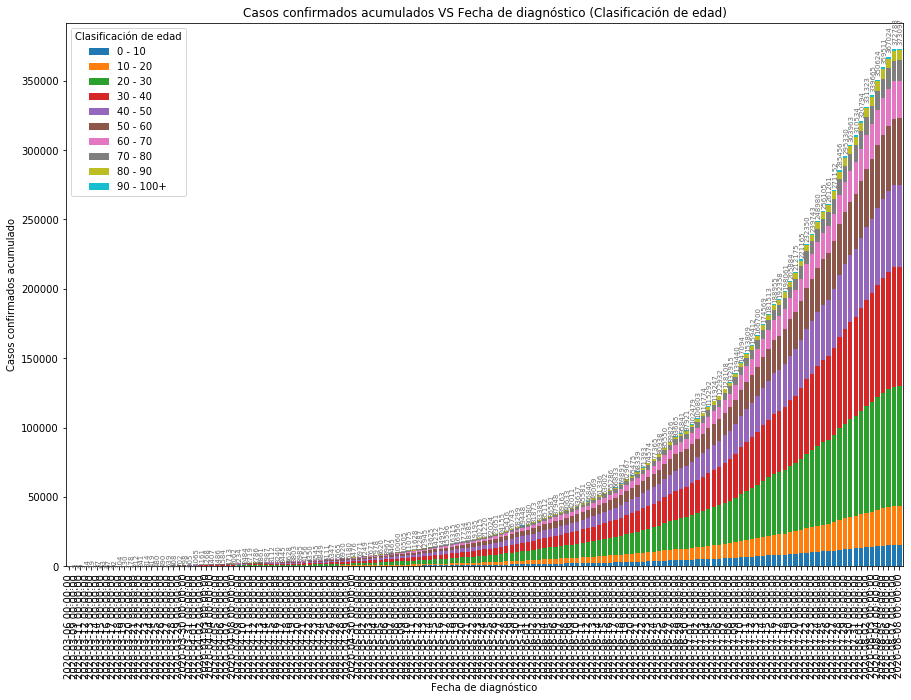

In [35]:
ax = data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulados VS Fecha de diagnóstico (Clasificación de edad)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Clasificación de edad'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Estado)

In [36]:
data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).cumsum()

Estado                    Casa  Fallecido  Hospital  Hospital uci    N/a  \
Fecha de diagnóstico                                                       
2020-03-06                 0.0        0.0       0.0           0.0    0.0   
2020-03-09                 0.0        0.0       0.0           0.0    0.0   
2020-03-11                 0.0        0.0       0.0           0.0    0.0   
2020-03-12                 0.0        0.0       0.0           0.0    0.0   
2020-03-13                 0.0        0.0       0.0           0.0    0.0   
...                        ...        ...       ...           ...    ...   
2020-08-04            119240.0    12156.0   15707.0        1540.0  762.0   
2020-08-05            127535.0    12262.0   16171.0        1558.0  766.0   
2020-08-06            134538.0    12343.0   16576.0        1579.0  769.0   
2020-08-07            139880.0    12349.0   16962.0        1604.0  769.0   
2020-08-08            140185.0    12349.0   16971.0        1604.0  769.0   

Estado                Recuperado  
Fecha de diagnóstico              
2020-03-06                   1.0  
2020-03-09                   3.0  
2020-03-11                   9.0  
2020-03-12                  14.0  
2020-03-13                  19.0  
...                          ...  
2020-08-04              201219.0  
2020-08-05              201219.0  
2020-08-06              201219.0  
2020-08-07              201219.0  
2020-08-08              201219.0  

[153 rows x 6 columns]

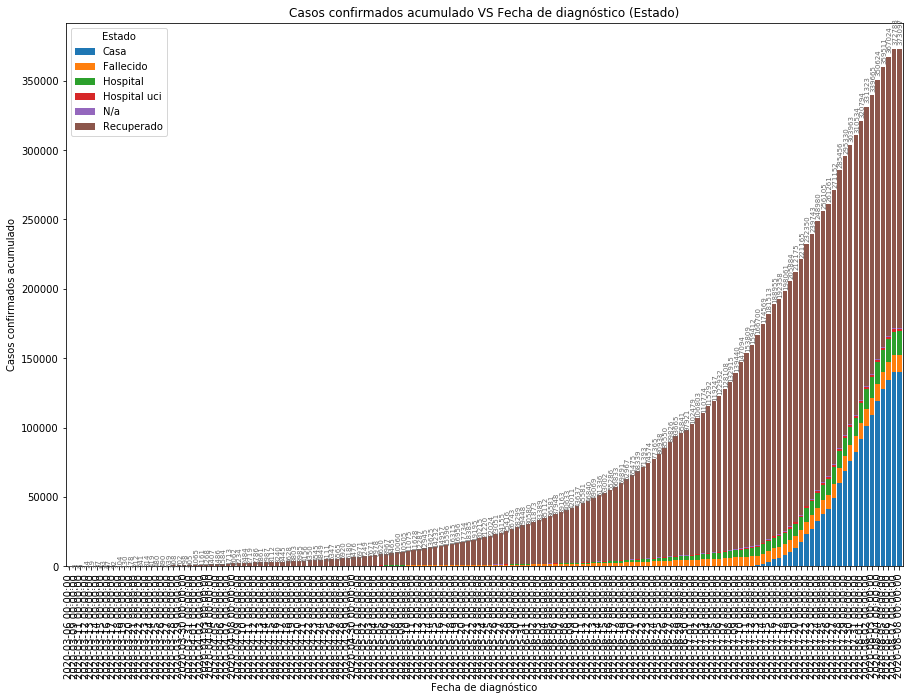

In [37]:
ax = data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulado VS Fecha de diagnóstico (Estado)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Estado'].unique())
numbers(div)

## #StayHome #QuédateEnCasa

### Made with ♥ by <a href='https://github.com/jlcadavid'>@jlcadavid</a>